In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
flightDataPath = 'gdrive/My Drive/FlightDelayPrediction/FlightData/'

In [0]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import pickle

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,LeakyReLU
from tensorflow.keras.optimizers import *
from tensorflow.keras import metrics


In [0]:
pkl_file = open(flightDataPath + '/JoinedData.pkl','rb')
df = pickle.load(pkl_file)
pkl_file.close()
le = LabelEncoder()

df['Origin'] = le.fit_transform(df['Origin'])
df['Dest'] = le.fit_transform(df['Dest'])

df.dropna(how='any',inplace=True)
df.drop(columns=['FlightDate','date','ArrTime','ArrDel15','CRSArrTime','NearestDepTime'],inplace=True)
df = df[df['ArrDelayMinutes'] > 0]
df = df.apply(pd.to_numeric)
X = df.loc[:, df.columns != 'ArrDelayMinutes']
y = df.loc[:, df.columns == 'ArrDelayMinutes']

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.25)

In [7]:
model = Sequential()
model.add(Dense(units = 32, input_dim = X_train.shape[1]))
model.add(LeakyReLU(alpha=0.0005 ))
model.add(Dense(units = 64))
model.add(LeakyReLU(alpha=0.0005 ))
model.add(Dense(units = 1  , activation = 'linear'))
model.compile(loss='mean_squared_error', optimizer=Nadam(), metrics=['mean_squared_error'])
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                768       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 2,945
Trainable params: 2,945
Non-trainable params: 0
_________________________________________________________________


In [8]:
h1 = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=20,batch_size=128,verbose=2,use_multiprocessing=True)

Train on 525213 samples, validate on 175071 samples
Epoch 1/20
525213/525213 - 7s - loss: 587.9713 - mean_squared_error: 587.9701 - val_loss: 333.9588 - val_mean_squared_error: 333.9587
Epoch 2/20
525213/525213 - 7s - loss: 262.2938 - mean_squared_error: 262.2935 - val_loss: 264.6373 - val_mean_squared_error: 264.6373
Epoch 3/20
525213/525213 - 7s - loss: 248.8462 - mean_squared_error: 248.8461 - val_loss: 244.1014 - val_mean_squared_error: 244.1013
Epoch 4/20
525213/525213 - 7s - loss: 243.5789 - mean_squared_error: 243.5793 - val_loss: 268.1866 - val_mean_squared_error: 268.1866
Epoch 5/20
525213/525213 - 7s - loss: 241.0083 - mean_squared_error: 241.0079 - val_loss: 252.1685 - val_mean_squared_error: 252.1685
Epoch 6/20
525213/525213 - 7s - loss: 239.8216 - mean_squared_error: 239.8220 - val_loss: 240.3525 - val_mean_squared_error: 240.3525
Epoch 7/20
525213/525213 - 7s - loss: 239.0974 - mean_squared_error: 239.0975 - val_loss: 249.5292 - val_mean_squared_error: 249.5293
Epoch 8/20

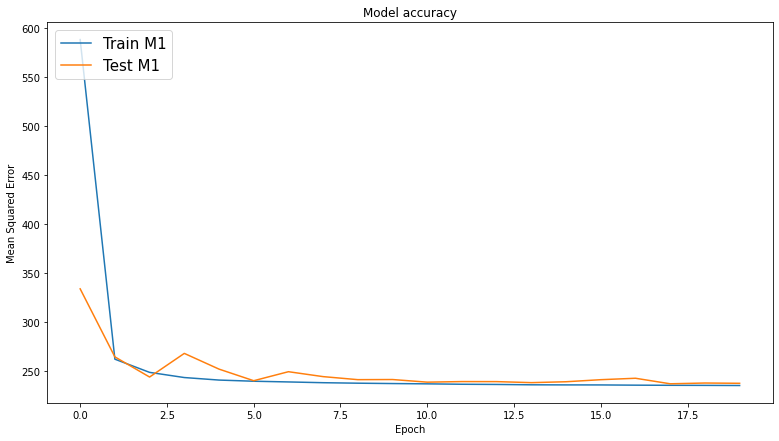

In [9]:

fig,ax0 = plt.subplots(figsize=(13,7))
ax0.plot(h1.history['mean_squared_error'])
ax0.plot(h1.history['val_mean_squared_error'])
ax0.set_title('Model accuracy')
ax0.set_ylabel('Mean Squared Error')
ax0.set_xlabel('Epoch')
ax0.legend(['Train M1', 'Test M1'], loc='upper left',fontsize=15)
plt.savefig('gdrive/My Drive/FlightDelayPrediction/ANNClassifierCharacteristics-V1.png')



In [0]:
from sklearn.metrics import classification_report,confusion_matrix,mean_squared_error,r2_score,mean_absolute_error

In [0]:
y_pred = model.predict(X_test,batch_size=64)

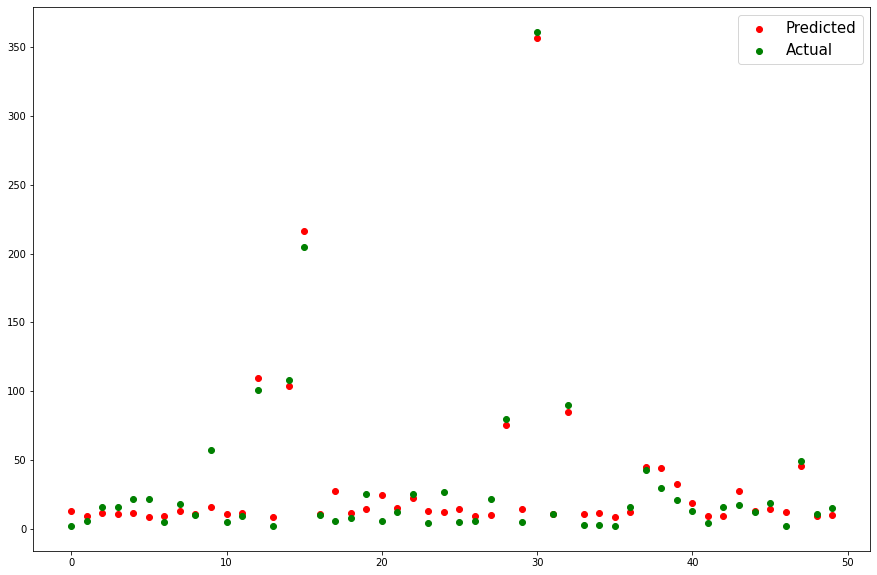

In [12]:
fig,ax1 = plt.subplots(figsize=(15,10))

ax1.scatter(x=[i for i in range(50)],y=y_pred[:50],c='red',label='Predicted')
ax1.scatter(x=[i for i in range(50)],y=y_test[:50],c='green',label='Actual')
ax1.legend(fontsize=15)
plt.show()


In [13]:
print(mean_squared_error(y_test,y_pred))

237.71798491030594


In [14]:
print(r2_score(y_test,y_pred))

0.9368207820138907


In [15]:
print(mean_absolute_error(y_test,y_pred))

10.376015990361564
